# 제 8 장 __인공신경망의 이해와 활용__
___

## __사전설정__
---

(1) 저장소 데이터 가져오기

In [ ]:
!rm -rf /content/BizDataAnalysis/

In [1]:
!git clone https://github.com/BizStat/BizDataAnalysis.git

Cloning into 'BizDataAnalysis'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 208 (delta 9), reused 29 (delta 4), pack-reused 174
Receiving objects: 100% (208/208), 124.57 MiB | 13.00 MiB/s, done.
Resolving deltas: 100% (62/62), done.
Updating files: 100% (51/51), done.



(2) matplotlib 환경에서 한글 사용

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -f -v
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,635 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

런타임 메뉴에서 '세션 다시 시작' 후 다음의 명령문 실행

In [1]:
from matplotlib import rc
rc('font', family='NanumGothicCoding')
rc('axes', unicode_minus=False)

(3) 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

___

## 8.2 __인공신경망의 이해__

### (1) 예측모형을 인공신경망으로 구현한 사례

* Boston house-price 데이터 가져오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boston = pd.read_table('/content/BizDataAnalysis/DATA/Boston.txt', sep='\s+')

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


__1.  학습데이터와 평가데이터 데이터분할__

* 강의노트에 있는 scikit-learn 라이브러리에서 제공하는 기능을 사용해도 동일한 결과를 얻을 수 있음

In [5]:
X_train = boston.sample(frac=0.7,random_state=3)
X_test = boston.drop(X_train.index)

In [6]:
y_train = X_train.pop('MEDV')
y_test = X_test.pop('MEDV')

In [7]:
#@title 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

__2.  분석에 사용할 신경망 모형 설정__

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
boston_nn_mod = Sequential(name='Boston_NN')

In [10]:
boston_nn_mod.add(Dense(2,input_dim=13,activation=None,name="Hidden_Layer_1"))

In [ ]:
#@title 활성함수 변경 사례
boston_nn_mod.add(Dense(2,input_dim=13,activation='relu',name="Hidden_Layer_1"))

In [ ]:
#@title 은닉층 추가 사례
boston_nn_mod.add(Dense(2,input_dim=2,activation='relu',name="Hidden_Layer_2"))

In [11]:
boston_nn_mod.add(Dense(1,name="Output_layer"))

In [12]:
boston_nn_mod.summary()

Model: "Boston_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 2)                 28        
                                                                 
 Output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(boston_nn_mod, show_shapes=True)

In [ ]:
ex_batch = X_train[:10]
ex_result = boston_nn_mod.predict(ex_batch)
ex_result

__3.  모형 컴파일__

In [13]:
boston_nn_mod.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

__4.  모형의 학습과 평가__

In [14]:
history = boston_nn_mod.fit(
  X_train, y_train,
  validation_data=(X_test,y_test),
  epochs=500,verbose=0
)

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,21.276564,3.269777,21.276564,24.837282,3.390951,24.837282,495
496,21.306887,3.264851,21.306887,24.816517,3.387820,24.816517,496
497,21.268810,3.262002,21.268810,24.834354,3.393448,24.834354,497
498,21.305264,3.274212,21.305264,24.877552,3.399369,24.877552,498
499,21.276463,3.279334,21.276463,24.858496,3.398815,24.858496,499


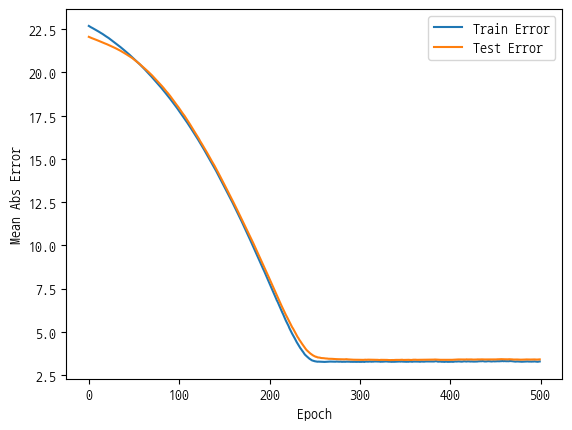

In [16]:
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mae'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],label = 'Test Error')
#  plt.ylim([0,5])
plt.legend()
plt.show()


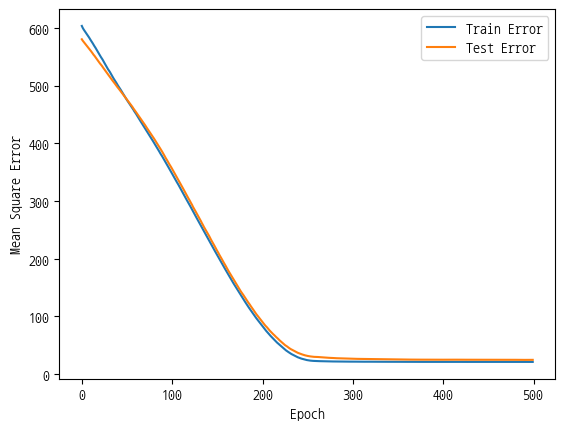

In [17]:
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(hist['epoch'], hist['mse'],label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],label = 'Test Error')
#plt.ylim([0,20])
plt.legend()
plt.show()

In [ ]:
score = boston_nn_mod.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

__5.  모형의 예측결과 살펴보기__

In [ ]:
y_test_pred = boston_nn_mod.predict(X_test)

In [ ]:
xref = np.arange(0,60,0.1)
yref = xref
plt.plot(xref,yref,c='red')

plt.scatter(y_test,y_test_pred)
plt.title('평가데이터에서 실제값 vs. 예측값 ')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.show()

__6.  모형의 저장__

In [ ]:
boston_nn_mod.save("Boston prediction NN model") # 모형 저장

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("Boston prediction NN model")

---

### (2) 분류모형을 인공신경망으로 구현한 사례

* 연체 데이터 가져오기

In [18]:
import pandas as pd
import numpy as np

In [19]:
default = pd.read_table('/content/BizDataAnalysis/DATA/Default.csv', sep=',')

In [ ]:
default.head()

* 독립변수와 종속변수로 분리 및 가변수 처리

In [20]:
X = default.iloc[:,2:]
y = default.iloc[:,[1]]
X = pd.get_dummies(X,drop_first=True,dtype=int)
y = pd.get_dummies(y,drop_first=True,dtype=int)

__1.  학습데이터와 평가데이터 데이터분할__

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3,train_size=0.7)

In [34]:
#@title 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#@title 데이터를 0과 1사이의 값으로 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

__2.  분석에 사용할 신경망 모형 설정__

In [23]:
default_nn_mod = Sequential(name='Default_NN')

In [28]:
default_nn_mod.add((Dense(64,activation='relu',name="Hidden_Layer_1")))
default_nn_mod.add((Dense(64,activation='relu',name="Hidden_Layer_2")))
default_nn_mod.add((Dense(1,activation='sigmoid',name="Output_Layer")))

In [ ]:
default_nn_mod.summary()

__3.  모형 컴파일__

In [29]:
default_nn_mod.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

__4.  모형의 학습과 평가__

In [35]:
history = default_nn_mod.fit(
  X_train, y_train,
  validation_split = 0.2,
  epochs=500, batch_size=64,
  verbose=0
)

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
495,0.069071,0.975000,0.095811,0.965714,495
496,0.069255,0.974464,0.089566,0.966429,496
497,0.069216,0.973750,0.091773,0.970000,497
498,0.069523,0.975000,0.091148,0.964286,498
499,0.068594,0.975179,0.093900,0.964286,499


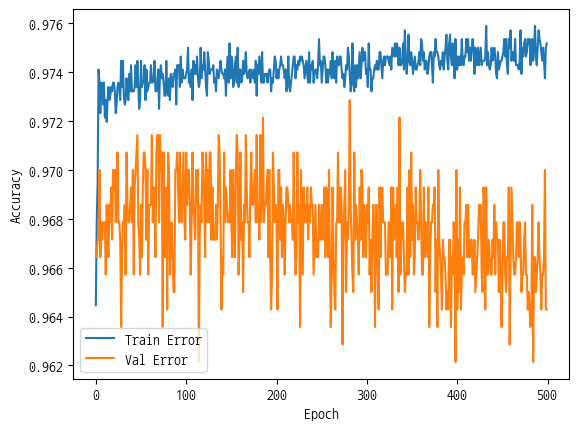

In [33]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['acc'],label='Train Error')
plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Error')
plt.legend()
plt.show()

__5.  모형의 예측결과 살펴보기__

In [ ]:
y_test_prob = default_nn_mod.predict(X_test)

In [ ]:
y_test_prob > 0,5

In [ ]:
y_test_pred = np.where(y_test_prob > 0.5 , 1, 0 )

In [ ]:
pd.crosstab(index=np.array(y_test['default_Yes']),columns=np.concatenate(y_test_pred))